#### Name : Vakeesan.K
#### Index N.O: 190643G

##### 1)


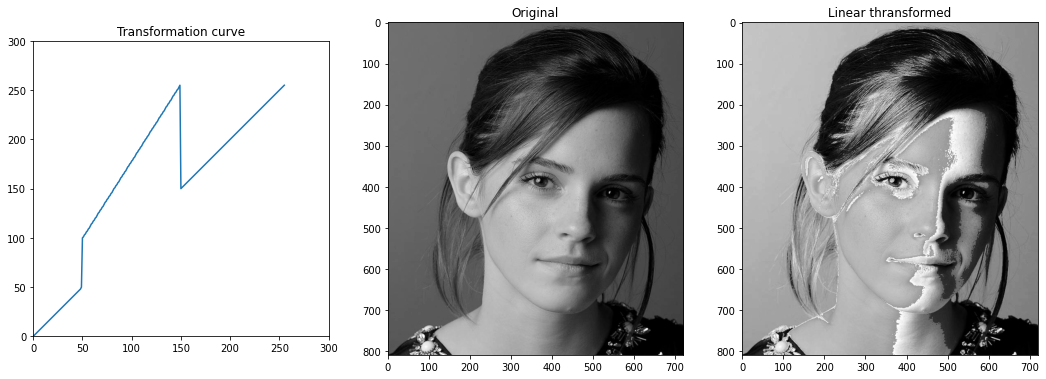

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img=cv.imread(r'C:\Python39\cv\assignment_01\emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert img is not None

t1=np.linspace(0,50,50)
t2=np.linspace(50,100,0)
t3=np.linspace(100,255,100)
t4=np.linspace(150,255,106)

t=np.concatenate((t1,t2,t3,t4),axis=0).astype(np.uint8)
fig,ax=plt.subplots(1,3,figsize=(18,9))

ax[0].plot(t)
ax[0].set_aspect('equal')
ax[0].set_xlim(0,300)
ax[0].set_ylim(0,300)
ax[0].set_title('Transformation curve')

assert len(t)== 256
g = cv.LUT(img,t)
ax[1].imshow(img,cmap='gray')
ax[1].set_title('Original')
ax[2].imshow(g,cmap='gray')
ax[2].set_title('Linear thransformed')
plt.show()







##### Discussion: Number of elements we have given in the x axis should be equal to 256. that's why i chose 106 istead of 105 when defining t4 .

##### 2)

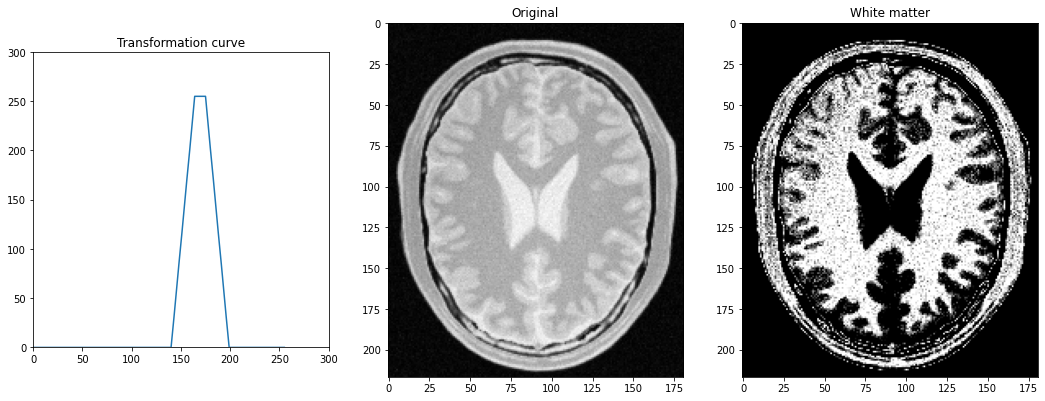

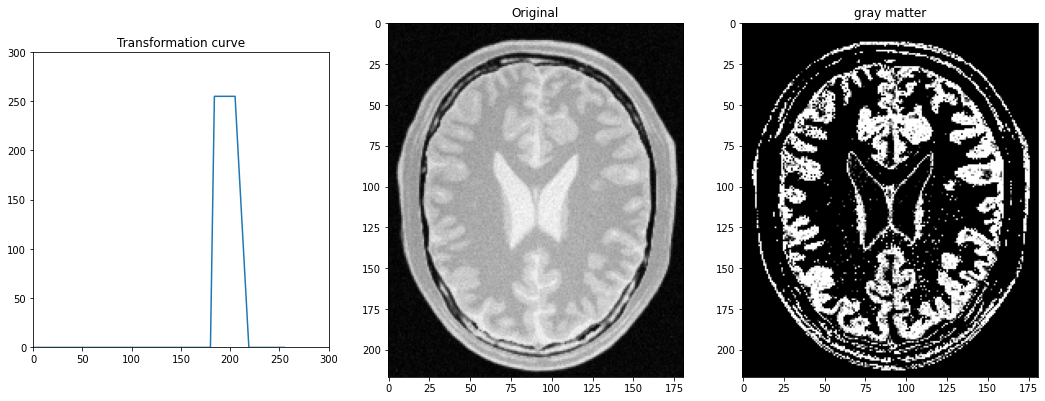

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img=cv.imread(r'C:\Python39\cv\assignment_01\brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert img is not None

t1=np.linspace(0,0,140)
t2=np.linspace(0,255,25)
t3=np.linspace(255,255,10)
t4=np.linspace(255,0,25)
t5=np.linspace(0,0,56)

t=np.concatenate((t1,t2,t3,t4,t5),axis=0).astype(np.uint8)

fig,ax=plt.subplots(1,3,figsize=(18,9))
ax[0].plot(t)
ax[0].set_aspect('equal')
ax[0].set_xlim(0,300)
ax[0].set_ylim(0,300)
ax[0].set_title('Transformation curve')

assert len(t)== 256
g = cv.LUT(img,t)
ax[1].imshow(img,cmap='gray')
ax[1].set_title('Original')
ax[2].imshow(g,cmap='gray')
ax[2].set_title('White matter')
plt.show()
t1_=np.linspace(0,0,180)
t2_=np.linspace(0,255,5)
t3_=np.linspace(255,255,20)
t4_=np.linspace(255,0,15)
t5_=np.linspace(0,0,36)

t_=np.concatenate((t1_,t2_,t3_,t4_,t5_),axis=0).astype(np.uint8)

fig,ax=plt.subplots(1,3,figsize=(18,9))
ax[0].plot(t_)
ax[0].set_aspect('equal')
ax[0].set_xlim(0,300)
ax[0].set_ylim(0,300)
ax[0].set_title('Transformation curve')

assert len(t_)== 256
h = cv.LUT(img,t_)
ax[1].imshow(img,cmap='gray')
ax[1].set_title('Original')
ax[2].imshow(h,cmap='gray')
ax[2].set_title('gray matter')
plt.show()

##### 3)


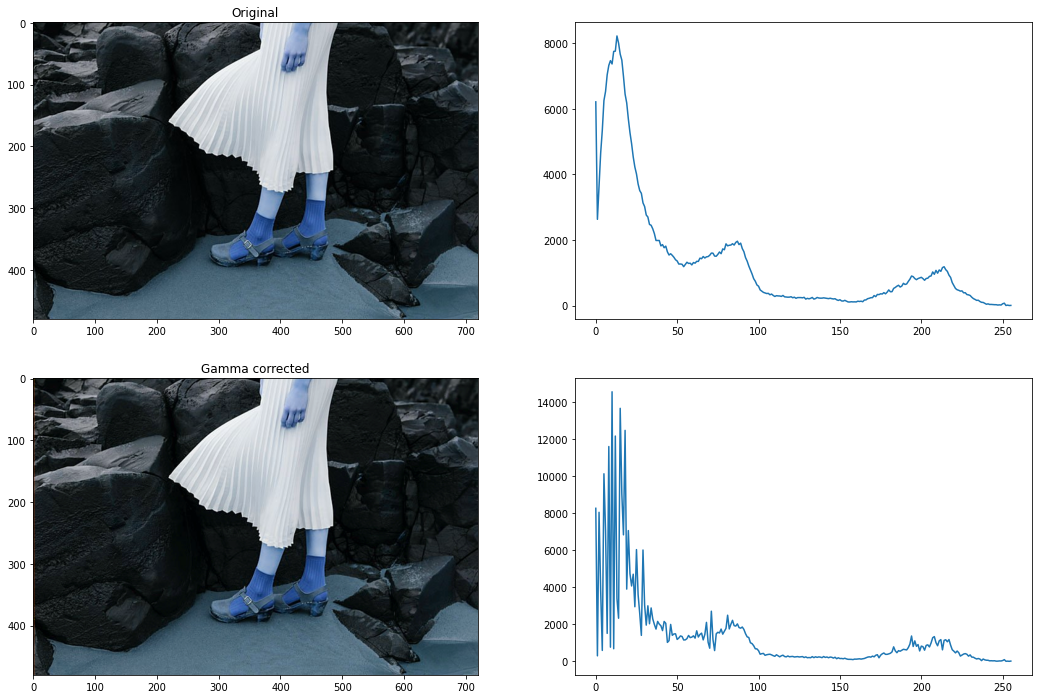

In [39]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread(r'C:\Python39\cv\assignment_01\highlights_and_shadows.jpg')
assert img is not None

gamma = 0.5

lab_img=cv.cvtColor(img,cv.COLOR_BGR2Lab).astype("float32")
lab_img[1,:,:] = lab_img[1,:,:] * gamma
gamma_img = cv.cvtColor(lab_img.astype("uint8"),cv.COLOR_Lab2BGR)

hist_i = cv.calcHist([img],[0],None,[256],[0,256])

hist_g = cv.calcHist([gamma_img],[0],None, [256],[0,256])


fig,ax=plt.subplots(2,2,figsize=(18,12))

ax[0][0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[0][0].set_title('Original')
ax[0][1].plot(hist_i)

ax[1][0].imshow(cv.cvtColor(gamma_img,cv.COLOR_BGR2RGB))
ax[1][0].set_title('Gamma corrected')
ax[1][1].plot(hist_g)

plt.show()



##### 4)

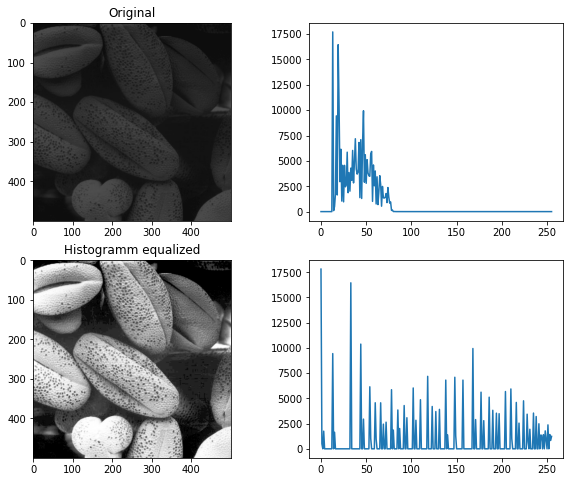

In [34]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f=cv.imread(r'C:\Python39\cv\exercices\lec 2\shells.tif', cv.IMREAD_GRAYSCALE)
assert f is not None

hist_f = cv.calcHist([f],[0],None,[256],[0,256])
g = cv.equalizeHist(f)
hist_g = cv.calcHist([g],[0],None, [256],[0,256])
fig, ax = plt.subplots(2,2, figsize=(10,8))


ax[0][0].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
ax[0][0].set_title('Original')
ax[0][1].plot(hist_f)

ax[1][0].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))
ax[1][0].set_title('Histogramm equalized')
ax[1][1].plot(hist_g)

plt.show()

##### 5)

##### 6)

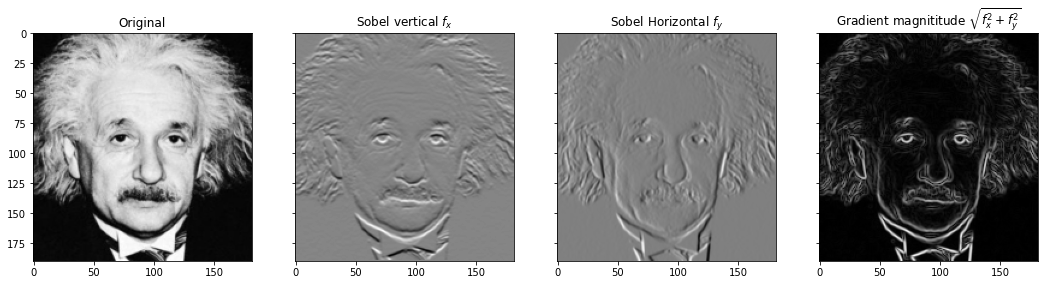

In [35]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mp_img

img = cv.imread(r'C:\Python39\cv\assignment_01\einstein.png',cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.float32)
assert img is not None

#sobel vertical
kernel_v=np.array([(-1,-2,-1),(0,0,0),(1,2,1)], dtype=np.float32)
imgv = cv.filter2D(img,-1,kernel_v)

#sobel horizontal
kernel_h=np.array([(-1,0,1),(-2,0,2),(-1,0,1)], dtype=np.float32)
imgh = cv.filter2D(img,-1,kernel_h)

grad_mag = np.sqrt(imgv**2+imgh**2)

fig,axes = plt.subplots(1,4,sharex='all', sharey='all',figsize=(18,6))
axes[0].imshow(img,cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(imgv,cmap='gray')
axes[1].set_title('Sobel vertical $f_x$')
axes[2].imshow(imgh,cmap='gray')
axes[2].set_title('Sobel Horizontal $f_y$')
axes[3].imshow(grad_mag,cmap='gray')
axes[3].set_title('Gradient magnititude $\sqrt{f_x^2 + f_y^2}$')

plt.show()